Confusion Matrix:
setosa: [19  0  0]
versicolor: [ 0 13  0]
virginica: [ 0  0 13]

Accuracy of the K-Nearest Neighbors classifier: 100.00%


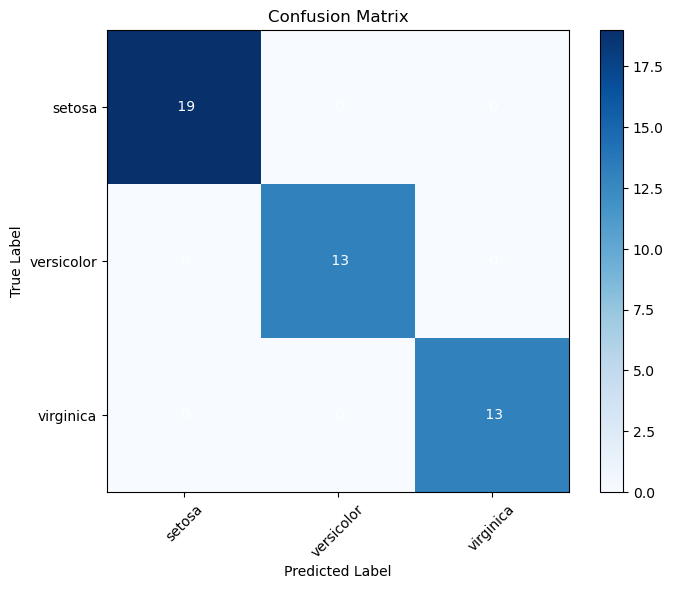

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset (replace with your actual file path)
iris_data = pd.read_csv("Iris_Flower_Dataset.csv")

# Map labels to species names
label_to_species = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Separate features (X) and target variable (y)
X = iris_data.drop(columns=["Species"])
y = iris_data["Species"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
for row, species in zip(confusion, label_to_species.values()):
    print(f"{species}: {row}")

print(f"\nAccuracy of the K-Nearest Neighbors classifier: {accuracy * 100:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_to_species))
plt.xticks(tick_marks, label_to_species.values(), rotation=45)
plt.yticks(tick_marks, label_to_species.values())
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
for i in range(len(label_to_species)):
    for j in range(len(label_to_species)):
        plt.text(j, i, f' {confusion[i, j]}', ha='center', va='center', color='white')

plt.show()
